In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
File1 = pd.read_csv('File1.csv')
File1

,SMILES,IC50,pIC50,Nationality
0,COC1=NC(=CN=C1CN2CC3(C2)CCC(=O)N3)C4=CC=CC(=C4...,0.080,10.096910,France
1,COC1=NC(=CN=C1CN2CC(C2)O)C3=CC=CC(=C3F)C4=C(C(...,0.135,9.869666,Germany
2,COC1CN(C1)CC2=NC=C(N=C2OC)C3=CC=CC(=C3F)C4=C(C...,0.318,9.497573,Vietnam
3,CC(=O)N1CC2(C1)CN(C2)CC3=NC=C(N=C3OC)C4=CC=CC(...,0.086,10.065502,Italy
4,COC1=NC(=CN=C1CNCCO)C2=CC=CC(=C2F)C3=C(C(=CC=C...,0.213,9.671620,Japan
...,...,...,...,...
652,COC1=NC(=CN=C1CNC[C@@H]2CCC(=O)N2)C3=CC=CC(=C3...,0.121,9.917215,Vietnam
653,COC1=NC(=CN=C1CNCC2CCNC(=O)C2)C3=CC=CC(=C3Cl)C...,0.135,9.869666,Italy
654,COC1=NC(=CN=C1CNCC2CCNC2=O)C3=CC=CC(=C3Cl)C4=C...,0.064,10.193820,Japan
655,CC1=C(C=CC=C1C2=CN=C(C(=N2)OC)CN3CC4(C3)CN(C4)...,0.082,10.086186,France


### Ex 1: Generate a histogram of pIC50 and IC50. 
- Figure size: 8x6
- Name of horizontal axis: "Value", font is 14
- Name of vertical axis: "Count", font is 14
- Label: pIC50 - red color, IC50 - navy color
- Name of the figure "Histogram"
- Place the caption in the right corner of the figure (the number 50 must be subscript)

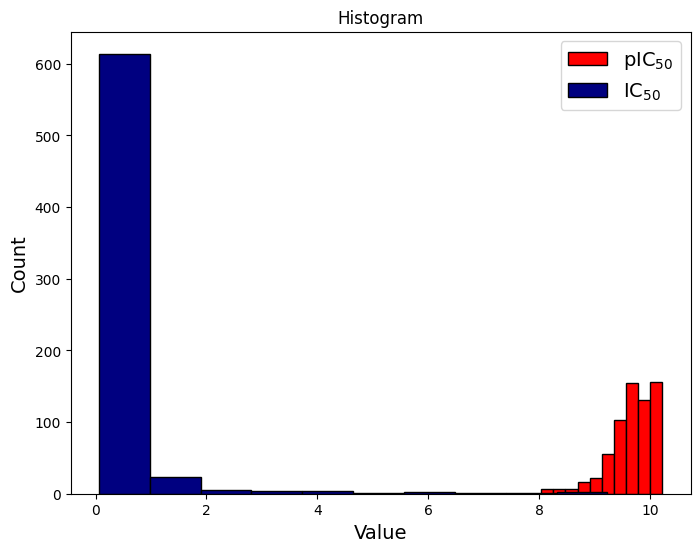

In [5]:
plt.figure(figsize= (8, 6))
plt.hist(File1.pIC50, color = 'red', label = 'pIC$_{50}$', edgecolor='black')
plt.hist(File1.IC50, color = 'navy', label = 'IC$_{50}$', edgecolor='black')
plt.xlabel ('Value', fontsize = 14)
plt.ylabel ('Count', fontsize = 14)
legend = plt.legend(loc='upper right', fontsize=14)
plt.title('Histogram')
plt.show()

### Ex 2: Generate a scatter plot with the horrizontal axis being pIC50, the vertical axis being IC50
*Draw a straight line from the highest and lowest point in scatter plot

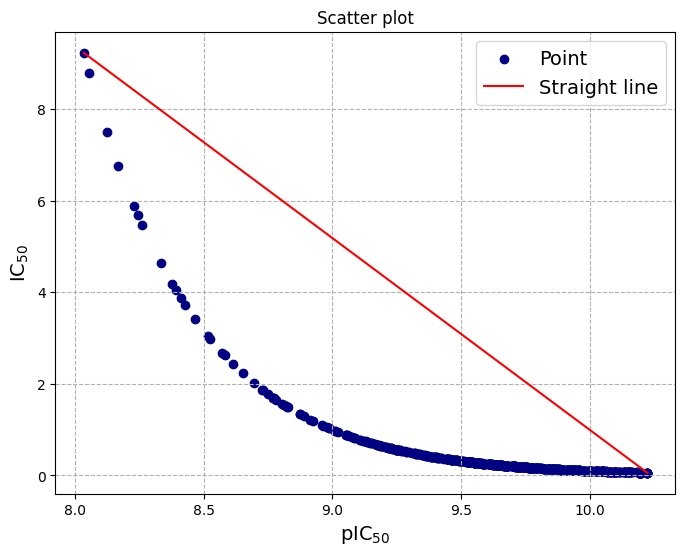

In [7]:
plt.figure(figsize= (8,6))
plt.scatter (x = File1.pIC50, y = File1.IC50, color = 'navy', label = 'Point')
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.xlabel ('pIC$_{50}$', fontsize = 14)
plt.ylabel ('IC$_{50}$', fontsize = 14)
xpoints = np.array([File1.pIC50.min(), File1.pIC50.max()])
ypoints = np.array([File1.IC50.max(), File1.IC50.min()])
plt.plot(xpoints, ypoints, color = 'red', label = 'Straight line')
legend = plt.legend(loc = 'upper right', fontsize = 14)
plt.title('Scatter plot')
plt.show()

### Ex 3: Generate scatter plot and the linear regression line
- Creat a column named 'Pred', with the value of 100*(pIC50)$^{2}$ - 1800pIC50 + 3
- Create a scatter plot with the hirizontal axis being "pIC50", the vertical axis being "Pred"
- Create 3 straight lines (similar to the application domain in a QSAR model)
    + y = -8000
    + y = -8050
    + x = 9.5
- Generate a linear regression line between pIC50 and Pred. Fid a and b in y = ax + b 


In [8]:
File1['Pred'] = 100*(File1['pIC50']**2) - 1800*File1['pIC50'] + 3

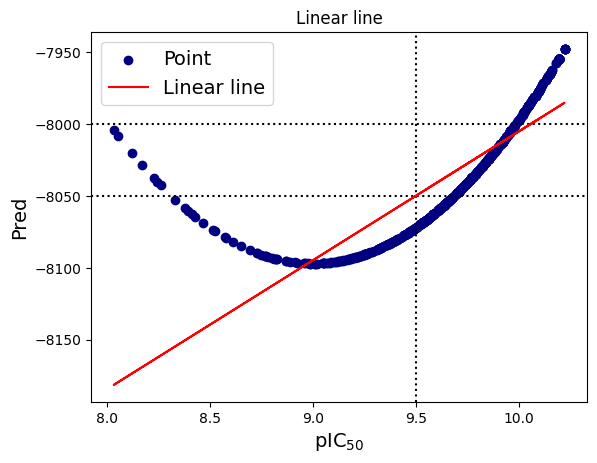

a: 89.73652607820185
b: -8902.428538628


In [11]:
plt.scatter(x = File1.pIC50, y = File1.Pred, color = 'navy', label = 'Point')
plt.xlabel('pIC$_{50}$', fontsize = 14)
plt.ylabel('Pred', fontsize = 14)

plt.axhline(y=-8000, color='black', linestyle='dotted')
plt.axhline(y=-8050, color='black', linestyle='dotted')
plt.axvline(x =9.5, color='black', linestyle='dotted')

slope, intercept = np.polyfit(File1.pIC50, File1.Pred, 1)
best_fit_line = slope * File1.pIC50 + intercept
plt.plot(File1.pIC50, best_fit_line, color='red', label = 'Linear line')

plt.title('Linear line')
legend = plt.legend(loc = 'upper left', fontsize = 14)
plt.show()
print('a:', slope)
print('b:', intercept)


### Ex 4: 
- Create a column of 'pIC60' with pIC60 = 2pIC50 - 10 
- Generate boxplot of pIC50 và pIC60

In [12]:
File1['pIC60'] = 2*File1['pIC50'] - 10

C:\Users\Admin\AppData\Local\Temp\ipykernel_13628\3871458194.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data, positions=positions, labels=labels, patch_artist=True)


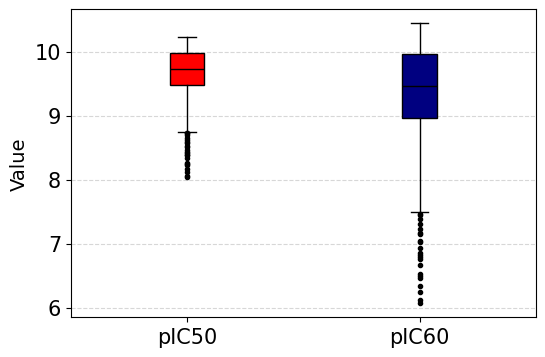

In [23]:
data = [File1.pIC50, File1.pIC60]
positions = [1, 2]
labels = ['pIC50', 'pIC60']
plt.figure(figsize=(6, 4))
box_plot = plt.boxplot(data, positions=positions, labels=labels, patch_artist=True)
colors = ['red', 'navy']

for box, color in zip(box_plot['boxes'], colors):
    box.set(color='black')
    box.set(facecolor=color)

for flier in box_plot['fliers']:
    flier.set(marker='o', color='black', markersize=3, markerfacecolor='black')

for line in box_plot["medians"]:
    line.set(color='black')  

plt.ylabel('Value', fontsize=14)  
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Ex 5: Generate a heatmap of pIC50 and pIC60

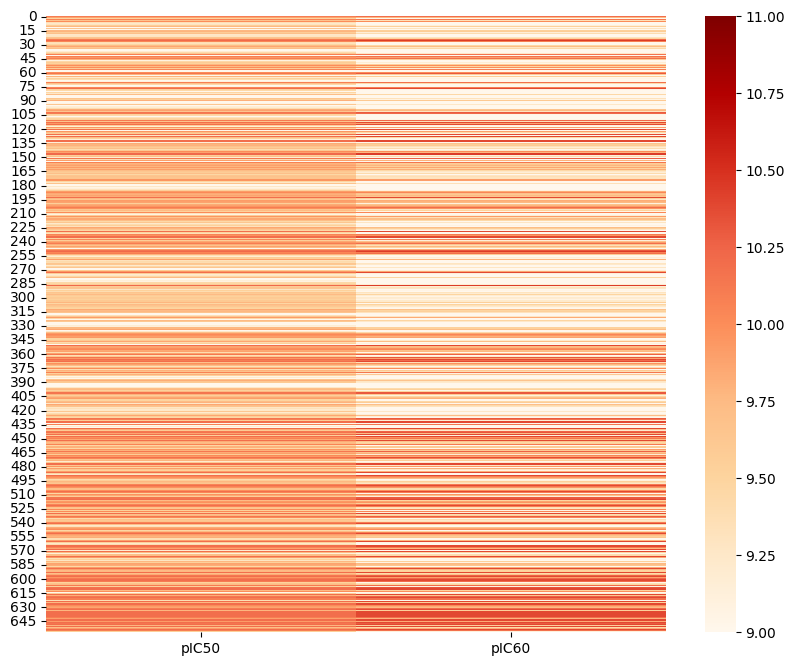

In [24]:
df = File1[['pIC50','pIC60']]
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap = 'OrRd', vmin = 9, vmax = 11)
plt.show()